# Activity 1.1

First importing the libraries that I will need in this activity.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import RegularPolygon
from matplotlib.collections import PatchCollection
from PIL import Image
import scipy.stats as ss
from scipy.interpolate import interp1d

##### 1.) and 2.) Creating the sinusoid along the x-axis and grating frequency.

Rescaling formula:
\begin{equation}
x_{\rm{scaled}} = \frac{x - \rm{min}(x)}{\rm{max}(x) - \rm{min}(x)}
\end{equation}

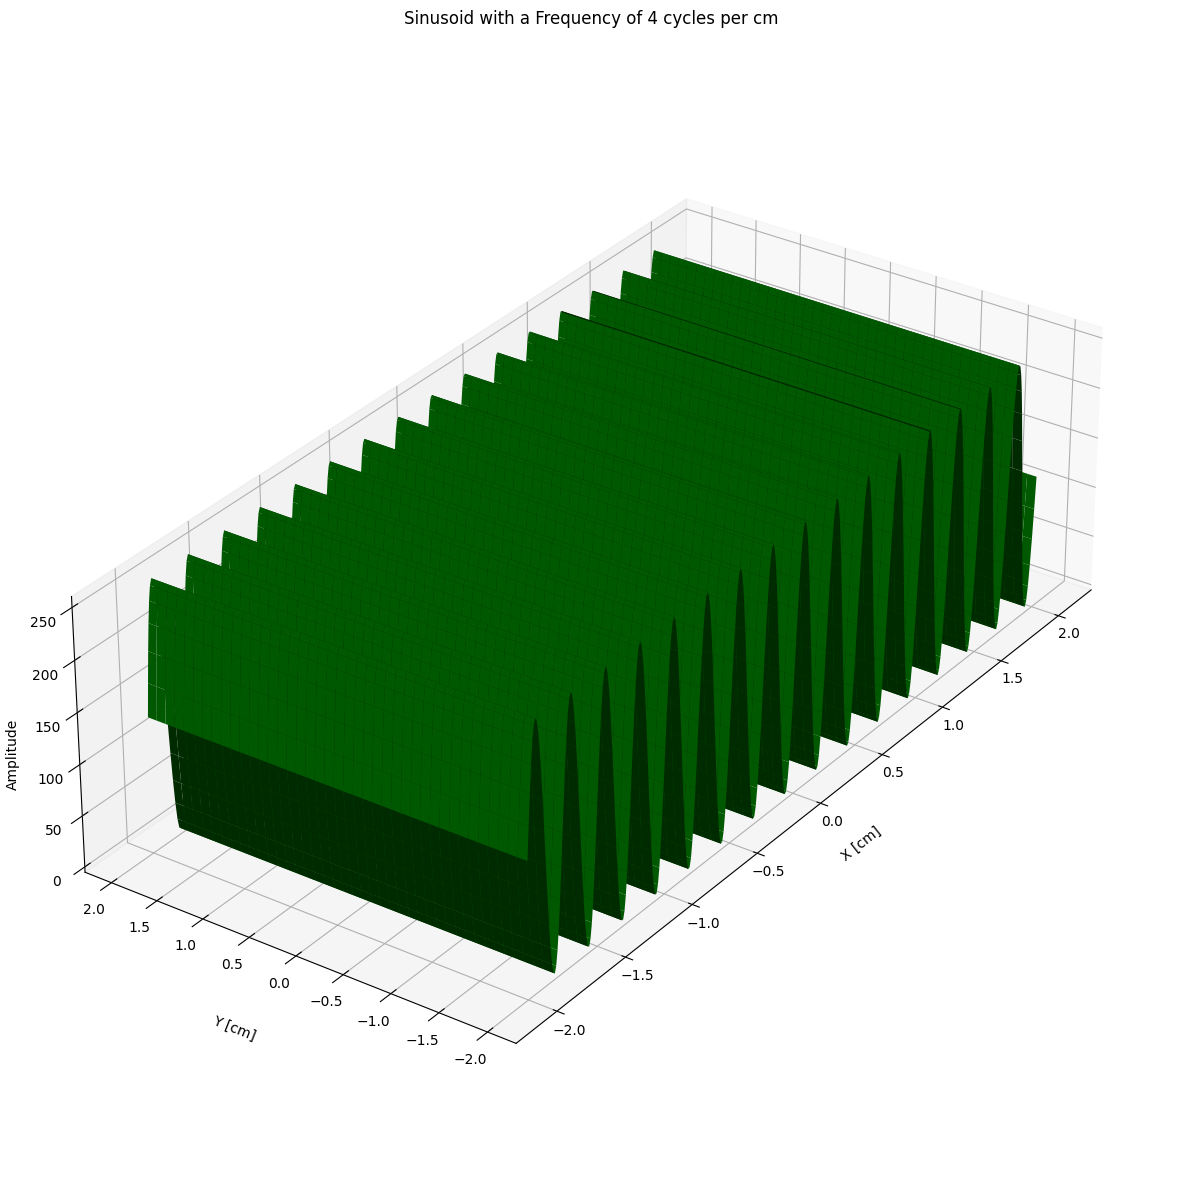

In [18]:
N = 400                        # number of data points
x = np.linspace(-2,2,N)        # range of x values
y = np.linspace(-2,2,N)        # range of y values
X,Y = np.meshgrid(x,y)         # making a mesh from the x and y values

cpm = 4                        # cycles per cm
f = 2*np.pi*4                  # frequency of teh sinusoid            
R = np.sin(f*X)
half_amp = 255/2

# Normalizing the values of the sinusoid from 0 to 255
R = 255*(R - min(map(min, R)))/(max(map(max,R)) - min(map(min, R))) 


fig = plt.figure(figsize = (15,30))
ax = plt.axes(projection='3d')

surface_color = ax.plot_surface(X, Y, R, color = "darkgreen", cstride=1, alpha = None)

ax.zaxis.set_rotate_label(False)
ax.set_xlabel('X [cm]', labelpad=20)
ax.set_ylabel('Y [cm]', labelpad=20)
ax.set_zlabel('Amplitude', labelpad=5, rotation = 90)
ax.set_box_aspect((1, 0.5, 0.3))
ax.set_title("Sinusoid with a Frequency of 4 cycles per cm", pad = -80)
ax.azim, ax.level = (-145, 30)
plt.show()


Now making the grid. A line pair from the sinusoid indicates one wave cycle. So for 5 line pairs/cm, I'll adjust $\tt R$ to be 5 cycles/cm.

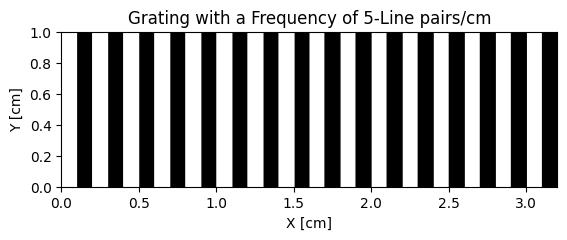

In [21]:
cpm = 5                              # cycles per cm
omega = 2*np.pi*cpm                  # frequency of the sinusoid

# Creating the sinusoid            
R = np.sin(f*X)
half_amp = 255/2

# Normalizing the values of the sinusoid from 0 to 255
R = 255*(R - min(map(min, R)))/(max(map(max,R)) - min(map(min, R))) 

A = np.zeros(R.shape)
A[R>half_amp] = 1

fig, ax = plt.subplots()
ax.imshow(A, cmap = "gray", extent = [0, 3.2, 0, 1])
ax.set_title("Grating with a Frequency of 5-Line pairs/cm")
ax.set_xlabel("X [cm]")
ax.set_ylabel("Y [cm]")
plt.show()

#### 3.) Hubble's Primary Mirror

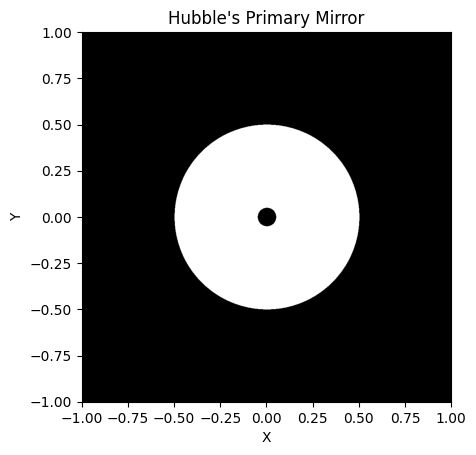

In [4]:
# Setting up grid and matrix
N = 1024                            # Higher pixels = higher quality  
x = np.linspace(-1,1,num = N)
y = x
X,Y = np.meshgrid(x,y)
A = np.zeros((N,N))

# Making the concentric circles
R = np.sqrt(X**2 + Y**2)
outer_radius = 0.5
inner_radius = 0.05

# Making the image
A[R < outer_radius] = 1.0
A[R < inner_radius] = 0

# Plotting
fig, ax = plt.subplots()
ax.imshow(A, cmap = "gray", extent = [-1, 1, -1, 1])
ax.set_title("Hubble's Primary Mirror")
ax.set_ylabel("Y")
ax.set_xlabel("X")
plt.show()


#### 4.) Hexagon arrray

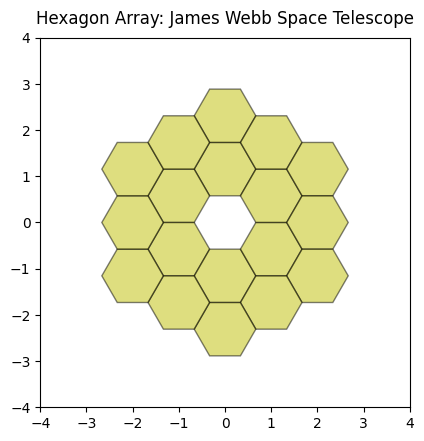

In [5]:
# source: https://www.geeksforgeeks.org/matplotlib-patches-regularpolygon-class-in-python/
# coords: (x,y,orientation)

coord = [[0, 1, -1],
         [-1, 1, 0],
         [-1, 0, 1],
         [0, -1, 1],
         [1, -1, 0],
         [1, 0, -1],
         [0,3,-1],
         [1,3,0],
         [2,1,-1],
         [2,0,0],
         [2,-1, 1],
         [1,-2,1],
         [0,-4,0],
         [-1, -2, 1],
         [-2, -1, 1],
         [-2, 0, 0],
         [-2, 1, -1],
         [-1, 2, -1]]
 
colors = ["y" for c in coord]
 
 
# Horizontal cartesian coords
hcoord = [c[0] for c in coord]
 
# Vertical cartesian coords
vcoord = [2. * np.sin(np.radians(60)) * (c[1] - c[2]) /3.
          for c in coord]


 
fig, ax = plt.subplots(1)
ax.set_aspect('equal')
 
# Add some coloured hexagons
for x, y, c in zip(hcoord, vcoord, colors):
     
    # matplotlib understands lower
    # case words for colours
    color = c[0].lower()
    hex = RegularPolygon((x, y),
                         numVertices = 6,
                         radius = 2. / 3.,
                         orientation = np.radians(30),
                         facecolor = color,
                         alpha = 0.5,
                         edgecolor ='k')
     
    ax.add_patch(hex)
    
ax.set_xlim([-4,4])
ax.set_ylim([-4,4])
ax.set_title("Hexagon Array: James Webb Space Telescope", pad = 10)
plt.show()

# 1.2

Creating olympic logo

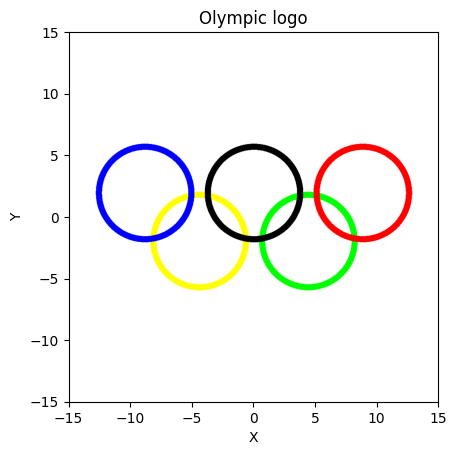

In [6]:
# Setting up xy grid, matrices, and circles
N = 1024
x = np.linspace(-15,15, N)
y = x
X,Y = np.meshgrid(x,y)
Blue = np.zeros((N,N),dtype=np.uint8)
Yellow = np.zeros((N,N),dtype=np.uint8)
Black = np.zeros((N,N),dtype=np.uint8)
Green = np.zeros((N,N),dtype=np.uint8)
Red = np.zeros((N,N),dtype=np.uint8)

Rt, Rc, deg = 3, 4, 30
xt, yt = Rt*np.cos(deg*np.pi/180), Rt*np.sin(deg*np.pi/180)
I = np.tile(255, (N,N,3))

R_Blue = np.sqrt((X+3.4*xt)**2 + (Y+1.3*yt)**2)
R_Black = np.sqrt((X)**2 + (Y+1.3*yt)**2)
R_Red = np.sqrt((X-3.4*xt)**2 + (Y+1.3*yt)**2)
R_Yellow = np.sqrt((X+1.7*xt)**2 + (Y-1.3*yt)**2)
R_Green = np.sqrt((X-1.7*xt)**2 + (Y-1.3*yt)**2)


# Lower row of circles
Green[R_Green<Rc] = 255
Green[R_Green == R_Black] = 0
Green[R_Green == R_Red] = 0
Green[R_Green < (Rc -0.5)] = 0

Yellow[R_Yellow < Rc] = 255
Yellow[R_Yellow == R_Blue] = 0 
Yellow[R_Yellow == R_Black] = 0 
Yellow[R_Yellow < (Rc -0.5)] = 0

# Upper row of circles
Blue[R_Blue<Rc]= 255
Blue[R_Blue < (Rc -0.5)] = 0

Black[R_Black<Rc] = 255
Black[R_Black < (Rc -0.5)] = 0

Red[R_Red<Rc] = 255
Red[R_Red < (Rc -0.5)] = 0


# Plotting the Circles
I[...,0] = 255 - Blue - Black                          
I[...,1] = 255 - Blue - Black  - Red                    
I[...,2] = 255 - Black - Red                            
I[...,2] = I[...,2]  - Yellow + Blue                  
I[...,0] = I[...,0] - Green + Red
I[...,2] = I[...,2] - Green 

# Clipping the values that are below 0 and above 255
I[I<0] = 0
I[I>255] = 255

fig, ax = plt.subplots()
ax.imshow(I, extent = [-15, 15, -15, 15])
ax.set_title("Olympic logo")
ax.set_ylabel("Y")
ax.set_xlabel("X")
plt.show()

In [7]:
img = I.astype(np.uint8)
plt.imsave("coloredcircle.jpg",img)
plt.imsave("coloredcircle.bmp",img)
plt.imsave("coloredcircle.png",img)
plt.imsave("coloredcircle.tiff",img)

# 1.4

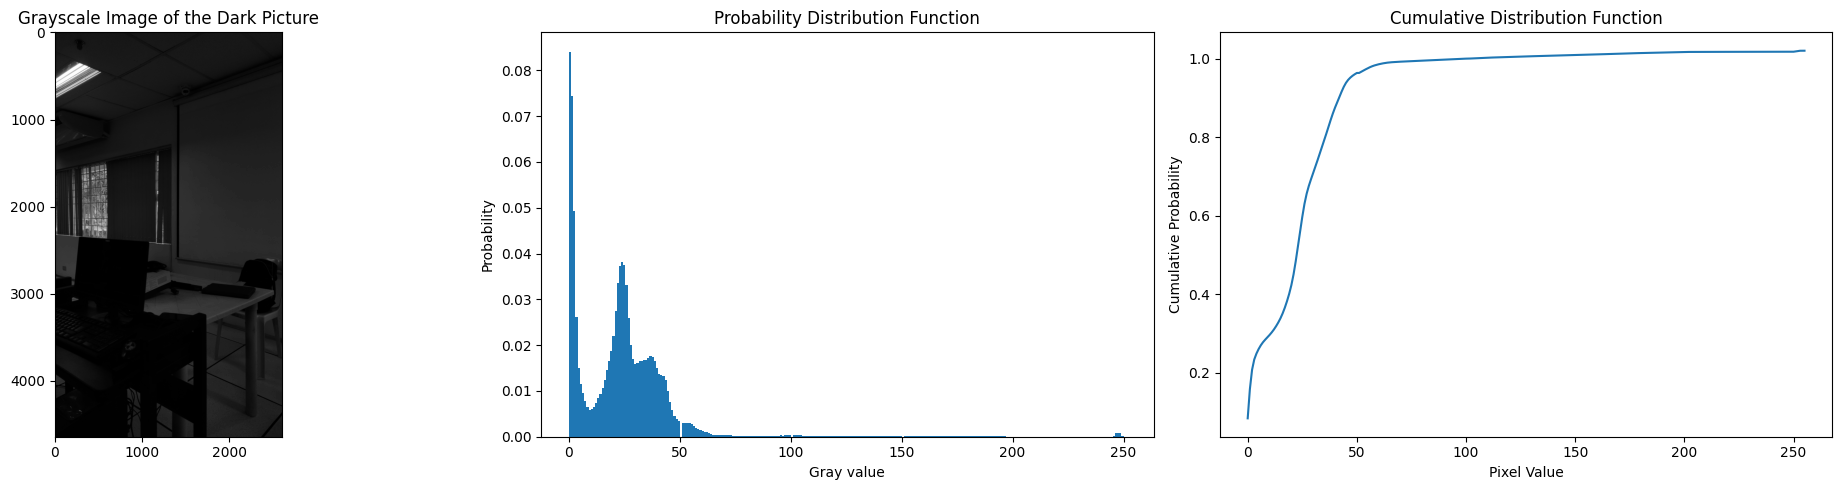

In [8]:
# read the image 
image = Image.open('.\dark_picture.jpg')

# Converting to grayscale
processed_image = np.array(image.convert('L'))

# Making the histogram of the grayscaled image
# Flattening image to make the program more efficient
x = np.arange(0,256,1)
flattened = processed_image.flatten()
norm_hist_values, bin_edges  = np.histogram(flattened, bins = 256, density = True)


# Now making the CDF
CDF = np.cumsum(norm_hist_values)

# plotting the PDF and CDF
fig, ax = plt.subplots(1,3, figsize = (20,5))
ax[0].imshow(processed_image, cmap = "gray")
ax[0].set_title("Grayscale Image of the Dark Picture")


ax[1].hist(flattened, density = True, bins = 256)
ax[1].set_ylabel("Probability")
ax[1].set_xlabel("Gray value")
ax[1].set_title("Probability Distribution Function")

ax[2].plot(x, CDF)
ax[2].set_ylabel("Cumulative Probability")
ax[2].set_xlabel("Pixel Value")
ax[2].set_title("Cumulative Distribution Function")
plt.tight_layout()
plt.show()


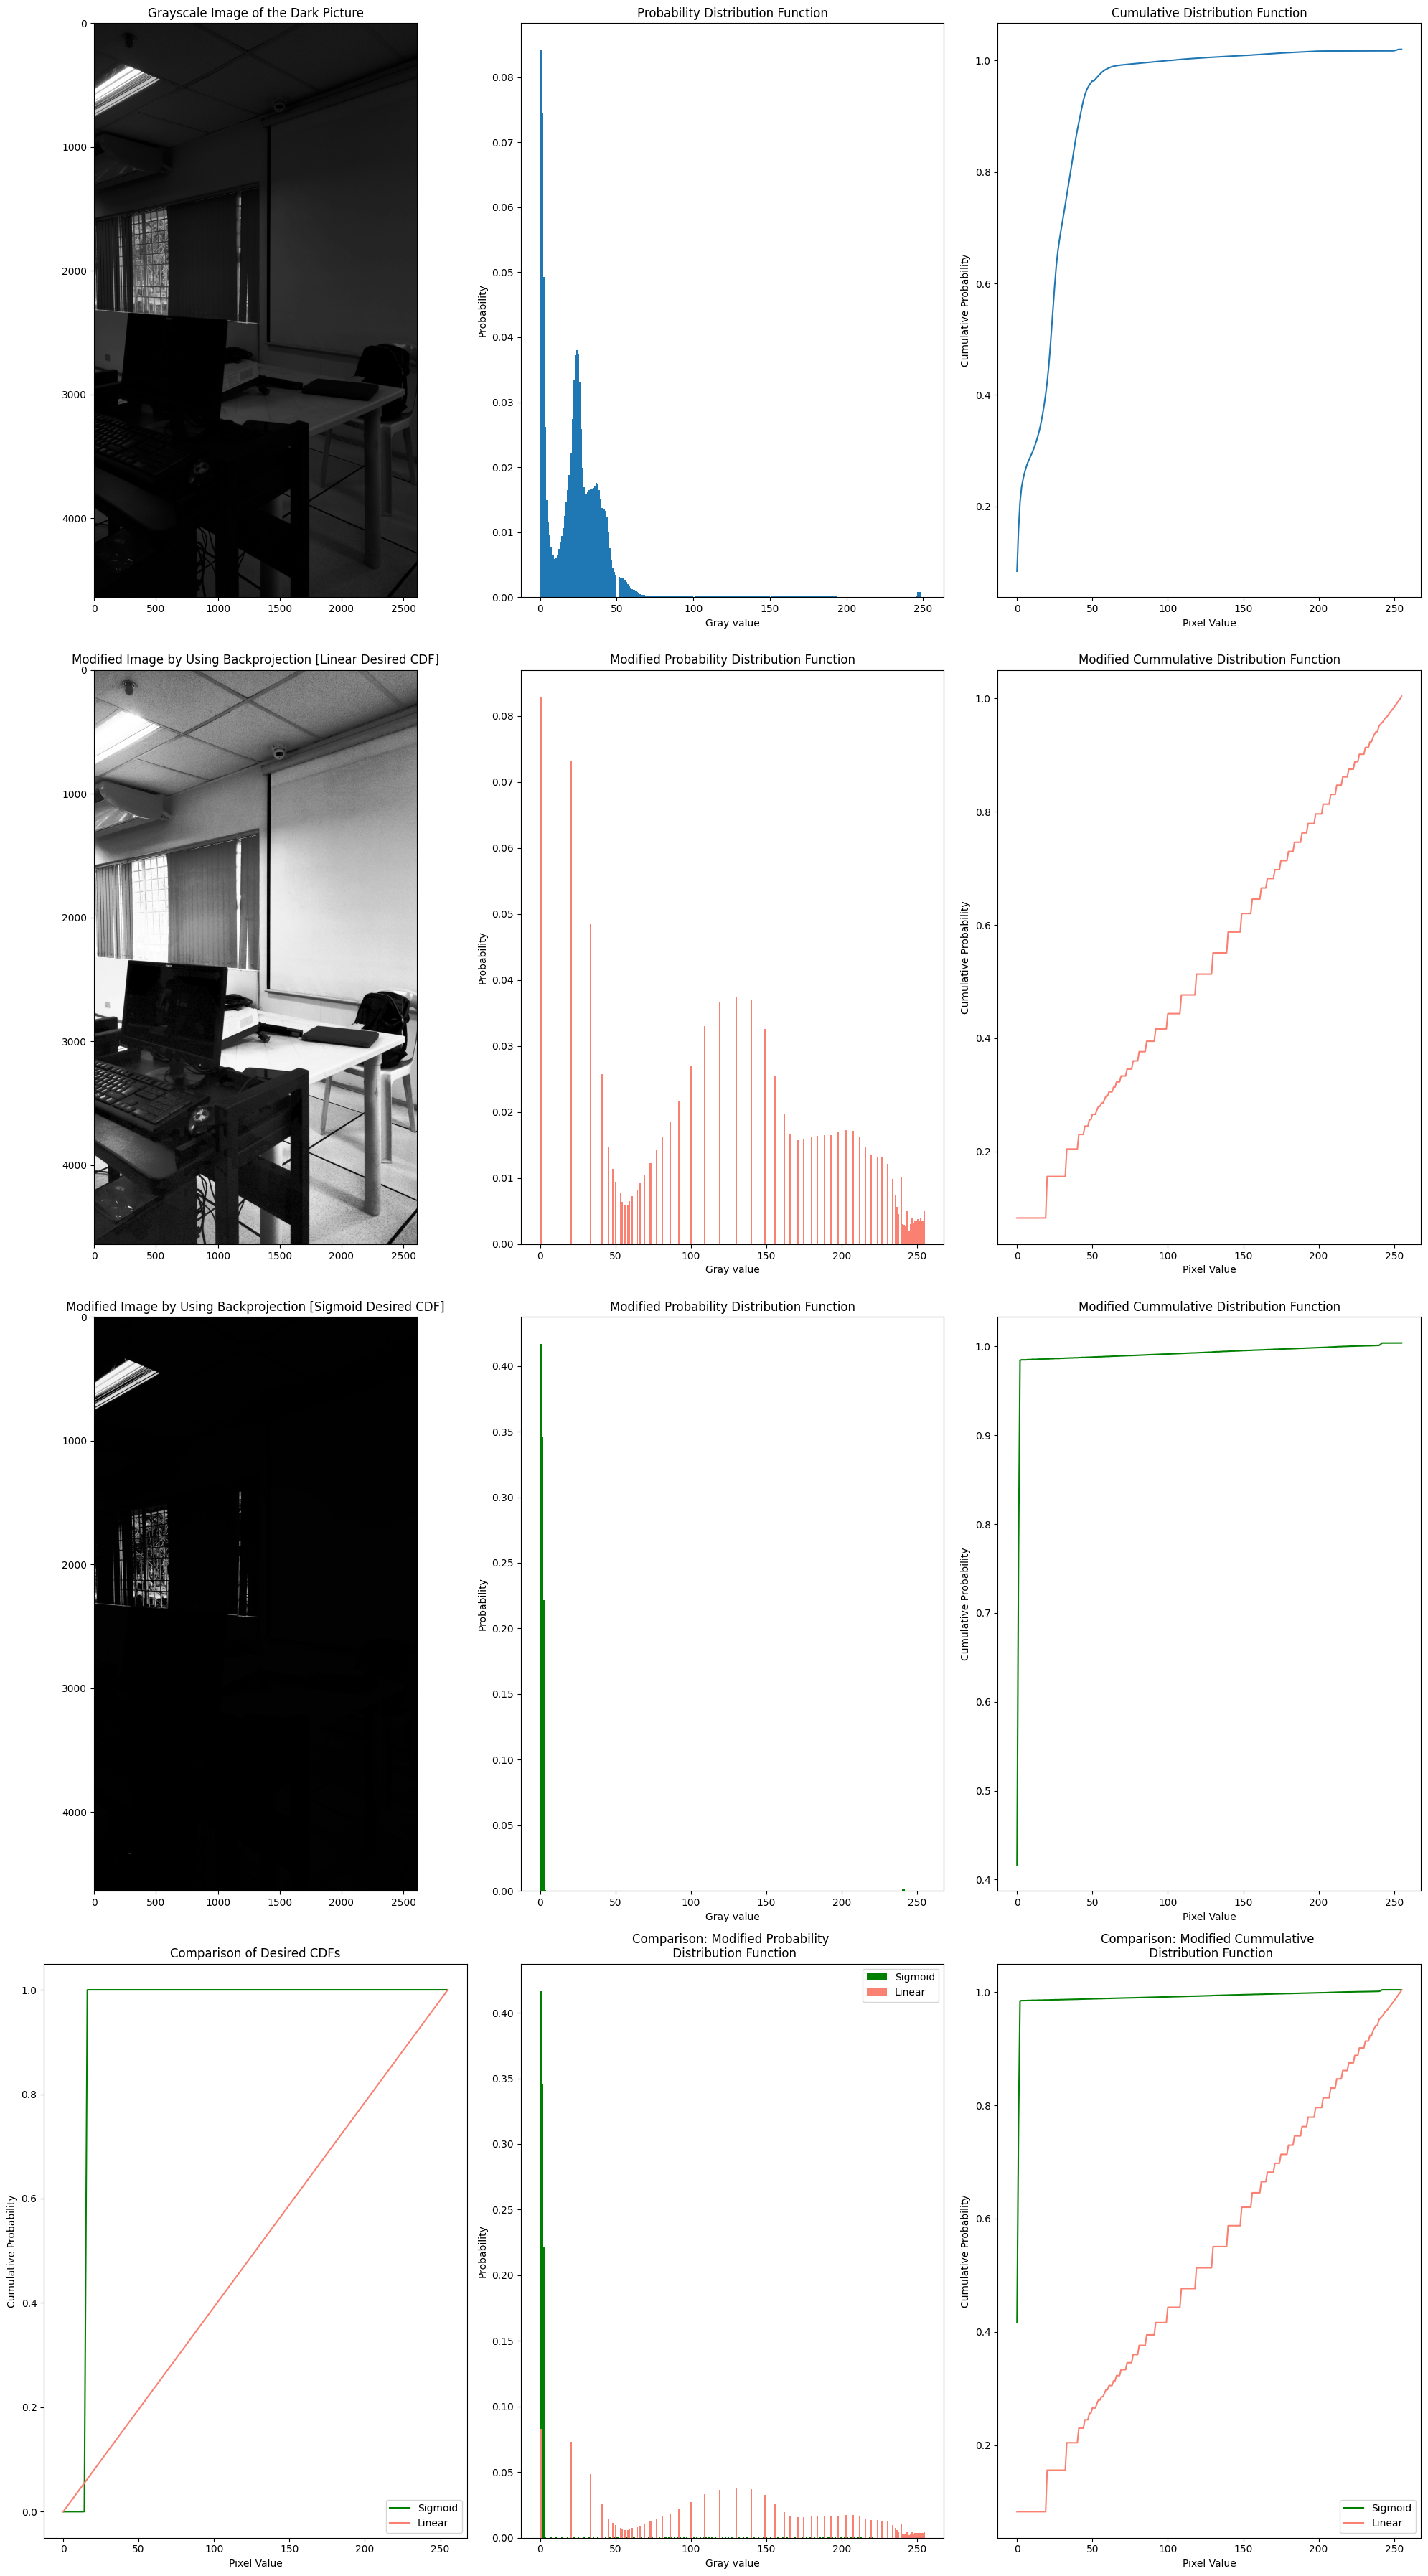

In [9]:
# Now applying histogram backprojecting
# The linear ideal CDF
desired_CDF = x/255
new_GS = np.interp(CDF[flattened], x, desired_CDF)
new_GS = np.reshape(new_GS, processed_image.shape)
new_GS = 255*(new_GS - np.min(new_GS))/(np.max(new_GS) - np.min(new_GS))

# Making PDF and CDF
GS_flattened = new_GS.flatten()
GS_norm_hist_values, bin_edges  = np.histogram(GS_flattened, bins = 256, density = True)

GS_CDF = np.cumsum(GS_norm_hist_values)


# Doing backprojecting using sigmoid CDF
sigmoid_CDF = 1/(1+np.exp(-(8.5*x-(255/2))))
sigmoid_new_GS = np.interp(CDF[flattened], x, sigmoid_CDF)
sigmoid_new_GS = np.reshape(sigmoid_new_GS, processed_image.shape)
sigmoid_new_GS = 255*(sigmoid_new_GS - np.min(sigmoid_new_GS))/(np.max(sigmoid_new_GS) - np.min(sigmoid_new_GS))

# Making PDF and CDF
sigmoid_GS_flattened = sigmoid_new_GS.flatten()
sigmoid_GS_norm_hist_values, bin_edges  = np.histogram(sigmoid_GS_flattened, bins = 256, density = True)

sigmoid_GS_CDF = np.cumsum(sigmoid_GS_norm_hist_values)


# Plotting everything

# Original
fig, ax = plt.subplots(4,3, figsize = (20, 36))
ax[0,0].imshow(processed_image, cmap = "gray")
ax[0,0].set_title("Grayscale Image of the Dark Picture")


ax[0,1].hist(flattened, density = True, bins = 256)
ax[0,1].set_ylabel("Probability")
ax[0,1].set_xlabel("Gray value")
ax[0,1].set_title("Probability Distribution Function")

ax[0,2].plot(x, CDF)
ax[0,2].set_ylabel("Cumulative Probability")
ax[0,2].set_xlabel("Pixel Value")
ax[0,2].set_title("Cumulative Distribution Function")

# Linear
ax[1,0].imshow(new_GS, cmap = "gray")
ax[1,0].set_title("Modified Image by Using Backprojection [Linear Desired CDF]")

ax[1,1].hist(GS_flattened, bins = 256, density = True, color = "salmon")
ax[1,1].set_ylabel("Probability")
ax[1,1].set_xlabel("Gray value")
ax[1,1].set_title("Modified Probability Distribution Function")


ax[1,2].plot(x, GS_CDF, color = "salmon")
ax[1,2].set_ylabel("Cumulative Probability")
ax[1,2].set_xlabel("Pixel Value")
ax[1,2].set_title("Modified Cummulative Distribution Function")

# Sigmoid
ax[2,0].imshow(sigmoid_new_GS, cmap = "gray")
ax[2,0].set_title("Modified Image by Using Backprojection [Sigmoid Desired CDF]")

ax[2,1].hist(sigmoid_GS_flattened, bins = 256, density = True, color = "g")
ax[2,1].set_ylabel("Probability")
ax[2,1].set_xlabel("Gray value")
ax[2,1].set_title("Modified Probability Distribution Function")


ax[2,2].plot(x, sigmoid_GS_CDF, color = "g")
ax[2,2].set_ylabel("Cumulative Probability")
ax[2,2].set_xlabel("Pixel Value")
ax[2,2].set_title("Modified Cummulative Distribution Function")

# Comparison
ax[3,0].plot(sigmoid_CDF, color = "g", label = "Sigmoid")
ax[3,0].plot(desired_CDF, color = "salmon", label = "Linear")
ax[3,0].set_ylabel("Cumulative Probability")
ax[3,0].set_xlabel("Pixel Value")
ax[3,0].set_title( "Comparison of Desired CDFs")
ax[3,0].legend()


ax[3,1].hist(sigmoid_GS_flattened, bins = 256, density = True, color = "g", label = "Sigmoid")
ax[3,1].hist(GS_flattened, bins = 256, density = True, color = "salmon", label = "Linear")
ax[3,1].set_ylabel("Probability")
ax[3,1].set_xlabel("Gray value")
ax[3,1].set_title( "Comparison: Modified Probability \n Distribution Function")
ax[3,1].legend()


ax[3,2].plot(x, sigmoid_GS_CDF, color = "g", label = "Sigmoid")
ax[3,2].plot(x, GS_CDF, color = "salmon", label = "Linear")
ax[3,2].set_ylabel("Cumulative Probability")
ax[3,2].set_xlabel("Pixel Value")
ax[3,2].set_title("Comparison: Modified Cummulative \n Distribution Function")
ax[3,2].legend()


plt.tight_layout()
plt.show()



# 1.5

for contrast stretching:
$$
I_{\rm{new}} = \frac{I_{\rm{old}} - I_{\rm{min}}}{I_{\rm{max}} - I_{\rm{min}}}
$$

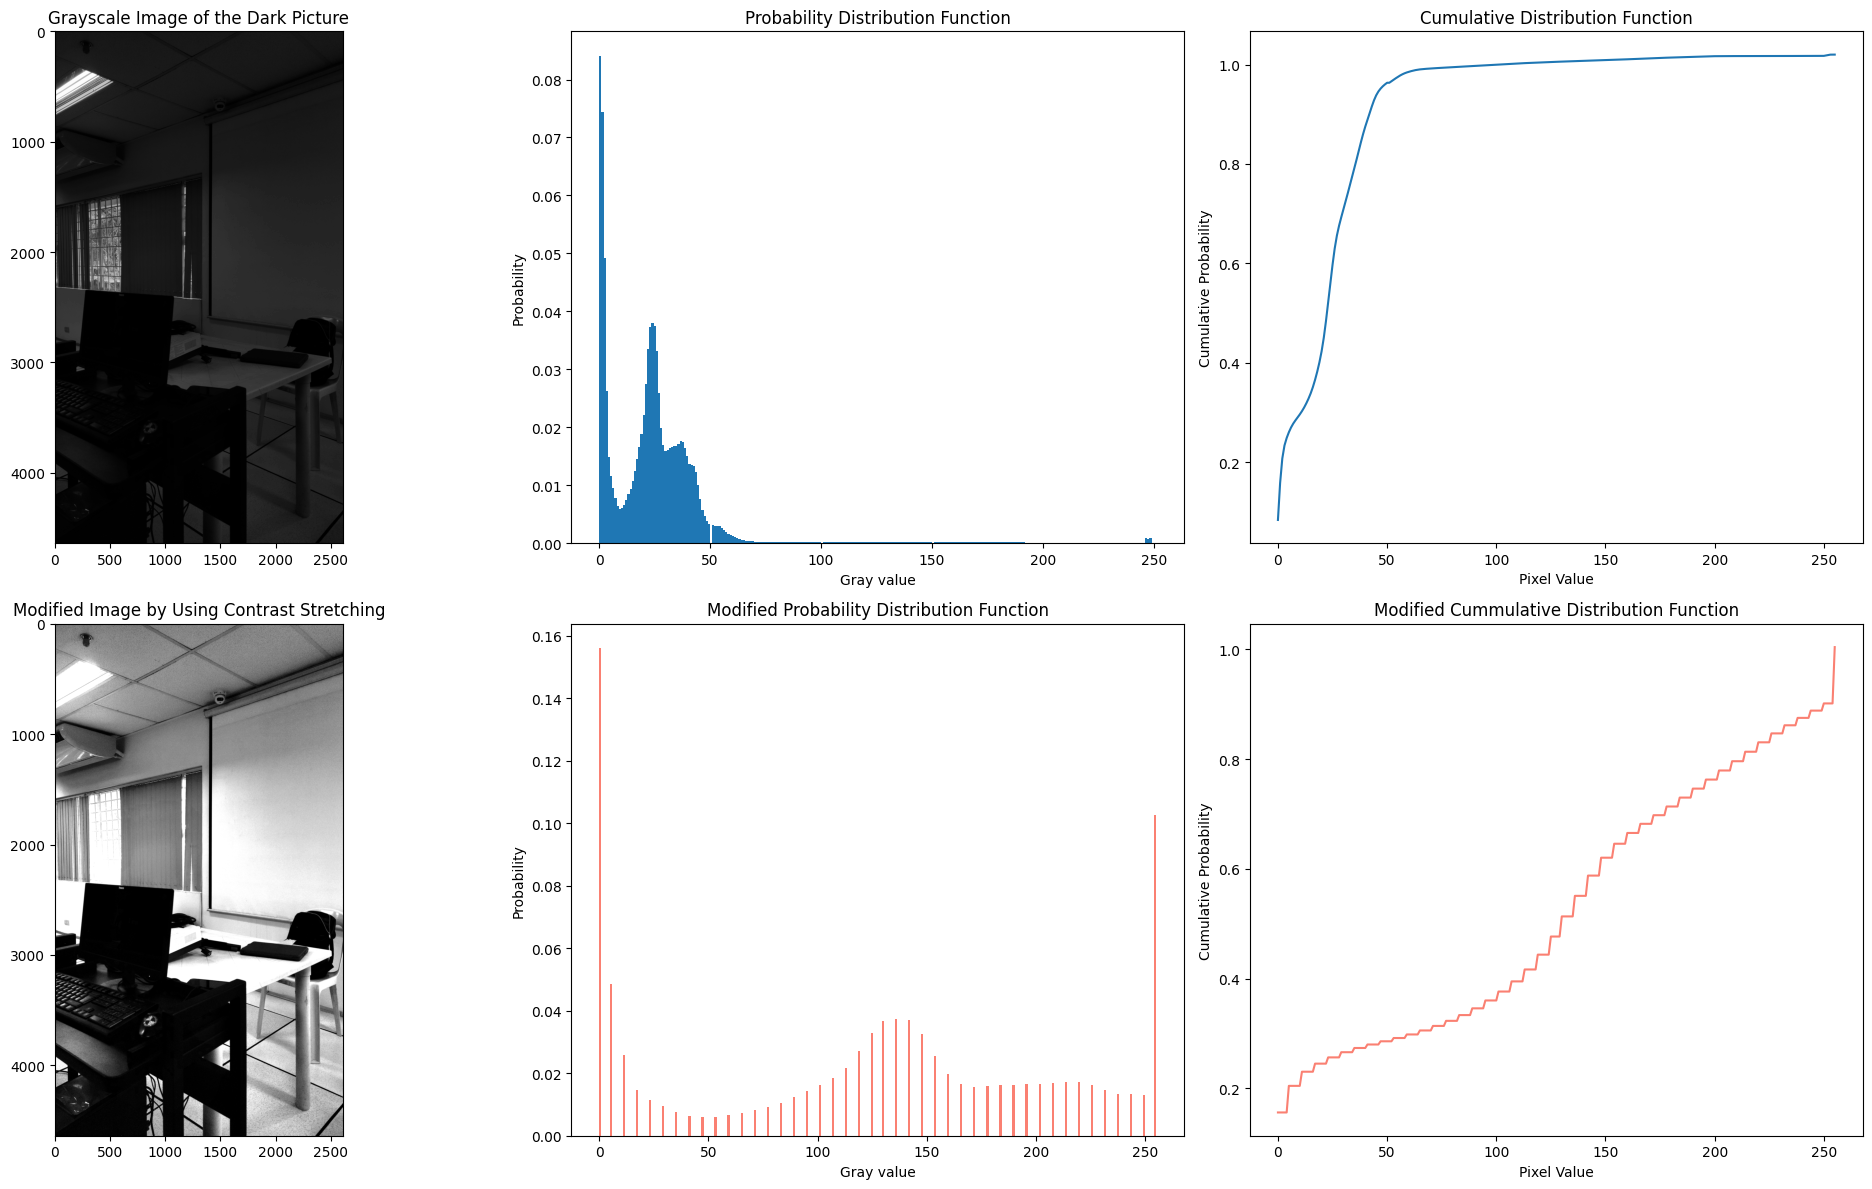

In [10]:
# read the image 
image = Image.open('.\dark_picture.jpg')

# Converting to grayscale
processed_image = np.array(image.convert('L'))

# Now making the PDF
flattened = processed_image.flatten()

# Getting hist values and normalizing them
hist_values, bin_edges  = np.histogram(flattened, bins = 256, density = True)

# Now making the CDF
CDF = np.cumsum(norm_hist_values)


# Applying contrast stretching
Imin = np.percentile(processed_image, 10)
Imax = np.percentile(processed_image, 90)
contrast_stretched = 255*(processed_image - Imin)/(Imax - Imin)
contrast_stretched[contrast_stretched < 0] = 0
contrast_stretched[contrast_stretched > 255] = 255

# Getting PDF and CDF of contrast stretched image
contrast_flattened = contrast_stretched.flatten()

# Getting hist values and normalizing them
contrast_hist_values, bin_edges  = np.histogram(contrast_flattened, bins = 256, density = True)

# Now making the CDF
contrast_CDF = np.cumsum(contrast_hist_values)





# Plotting everything
fig, ax = plt.subplots(2,3, figsize = (20, 12))
ax[0,0].imshow(processed_image, cmap = "gray")
ax[0,0].set_title("Grayscale Image of the Dark Picture")


ax[0,1].hist(flattened, density = True, bins = 256)
ax[0,1].set_ylabel("Probability")
ax[0,1].set_xlabel("Gray value")
ax[0,1].set_title("Probability Distribution Function")

ax[0,2].plot(x, CDF)
ax[0,2].set_ylabel("Cumulative Probability")
ax[0,2].set_xlabel("Pixel Value")
ax[0,2].set_title("Cumulative Distribution Function")


ax[1,0].imshow(contrast_stretched, cmap = "gray")
ax[1,0].set_title("Modified Image by Using Contrast Stretching")

ax[1,1].hist(contrast_flattened, bins = 256, density = True, color = "salmon")
ax[1,1].set_ylabel("Probability")
ax[1,1].set_xlabel("Gray value")
ax[1,1].set_title("Modified Probability Distribution Function")


ax[1,2].plot(x, contrast_CDF, color = "salmon")
ax[1,2].set_ylabel("Cumulative Probability")
ax[1,2].set_xlabel("Pixel Value")
ax[1,2].set_title("Modified Cummulative Distribution Function")
plt.tight_layout()
plt.show()


# 1.6

## a. Contrast Stretching

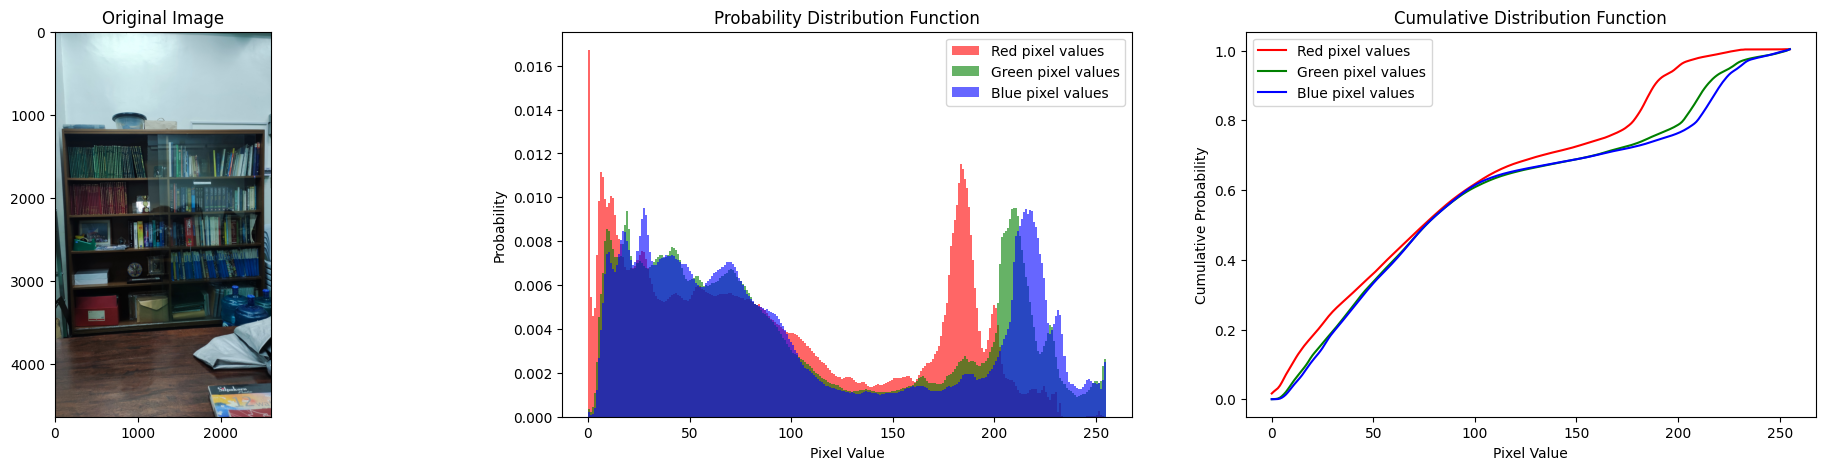

In [11]:
# read the image 
I = Image.open('.\image_for_1.6.jpg')
I = np.array(I, np.uint8)

# Getting the color channels
I_R = I[:,:,0]
I_G = I[:,:,1]
I_B = I[:,:,2]

# Getting hist values and normalizing them
R_norm_hist_values, bin_edges  = np.histogram(I_R, bins = 256, density = True)
G_norm_hist_values, bin_edges  = np.histogram(I_G, bins = 256, density = True)
B_norm_hist_values, bin_edges  = np.histogram(I_B, bins = 256, density = True)

# Now making the CDF
R_CDF = np.cumsum(R_norm_hist_values)
G_CDF = np.cumsum(G_norm_hist_values)
B_CDF = np.cumsum(B_norm_hist_values)

# Plotting everything
fig, ax = plt.subplots(1,3, figsize = (25,5))
ax[0].imshow(I)
ax[0].set_title("Original Image")

ax[1].hist(I_R.flatten(), bins = 256, color = "r", density = True, label = "Red pixel values", alpha = 0.6)
ax[1].hist(I_G.flatten(), bins = 256, color = "g", density = True, label = "Green pixel values", alpha = 0.6)
ax[1].hist(I_B.flatten(), bins = 256, color = "b", density = True, label = "Blue pixel values", alpha = 0.6)
ax[1].set_ylabel("Probability")
ax[1].set_xlabel("Pixel Value")
ax[1].set_title("Probability Distribution Function")
ax[1].legend()

ax[2].plot(x, R_CDF, color = "r", label = "Red pixel values")
ax[2].plot(x, G_CDF, color = "g", label = "Green pixel values")
ax[2].plot(x, B_CDF, color = "b", label = "Blue pixel values")
ax[2].set_ylabel("Cumulative Probability")
ax[2].set_xlabel("Pixel Value")
ax[2].set_title("Cumulative Distribution Function")
ax[2].legend()
plt.show()

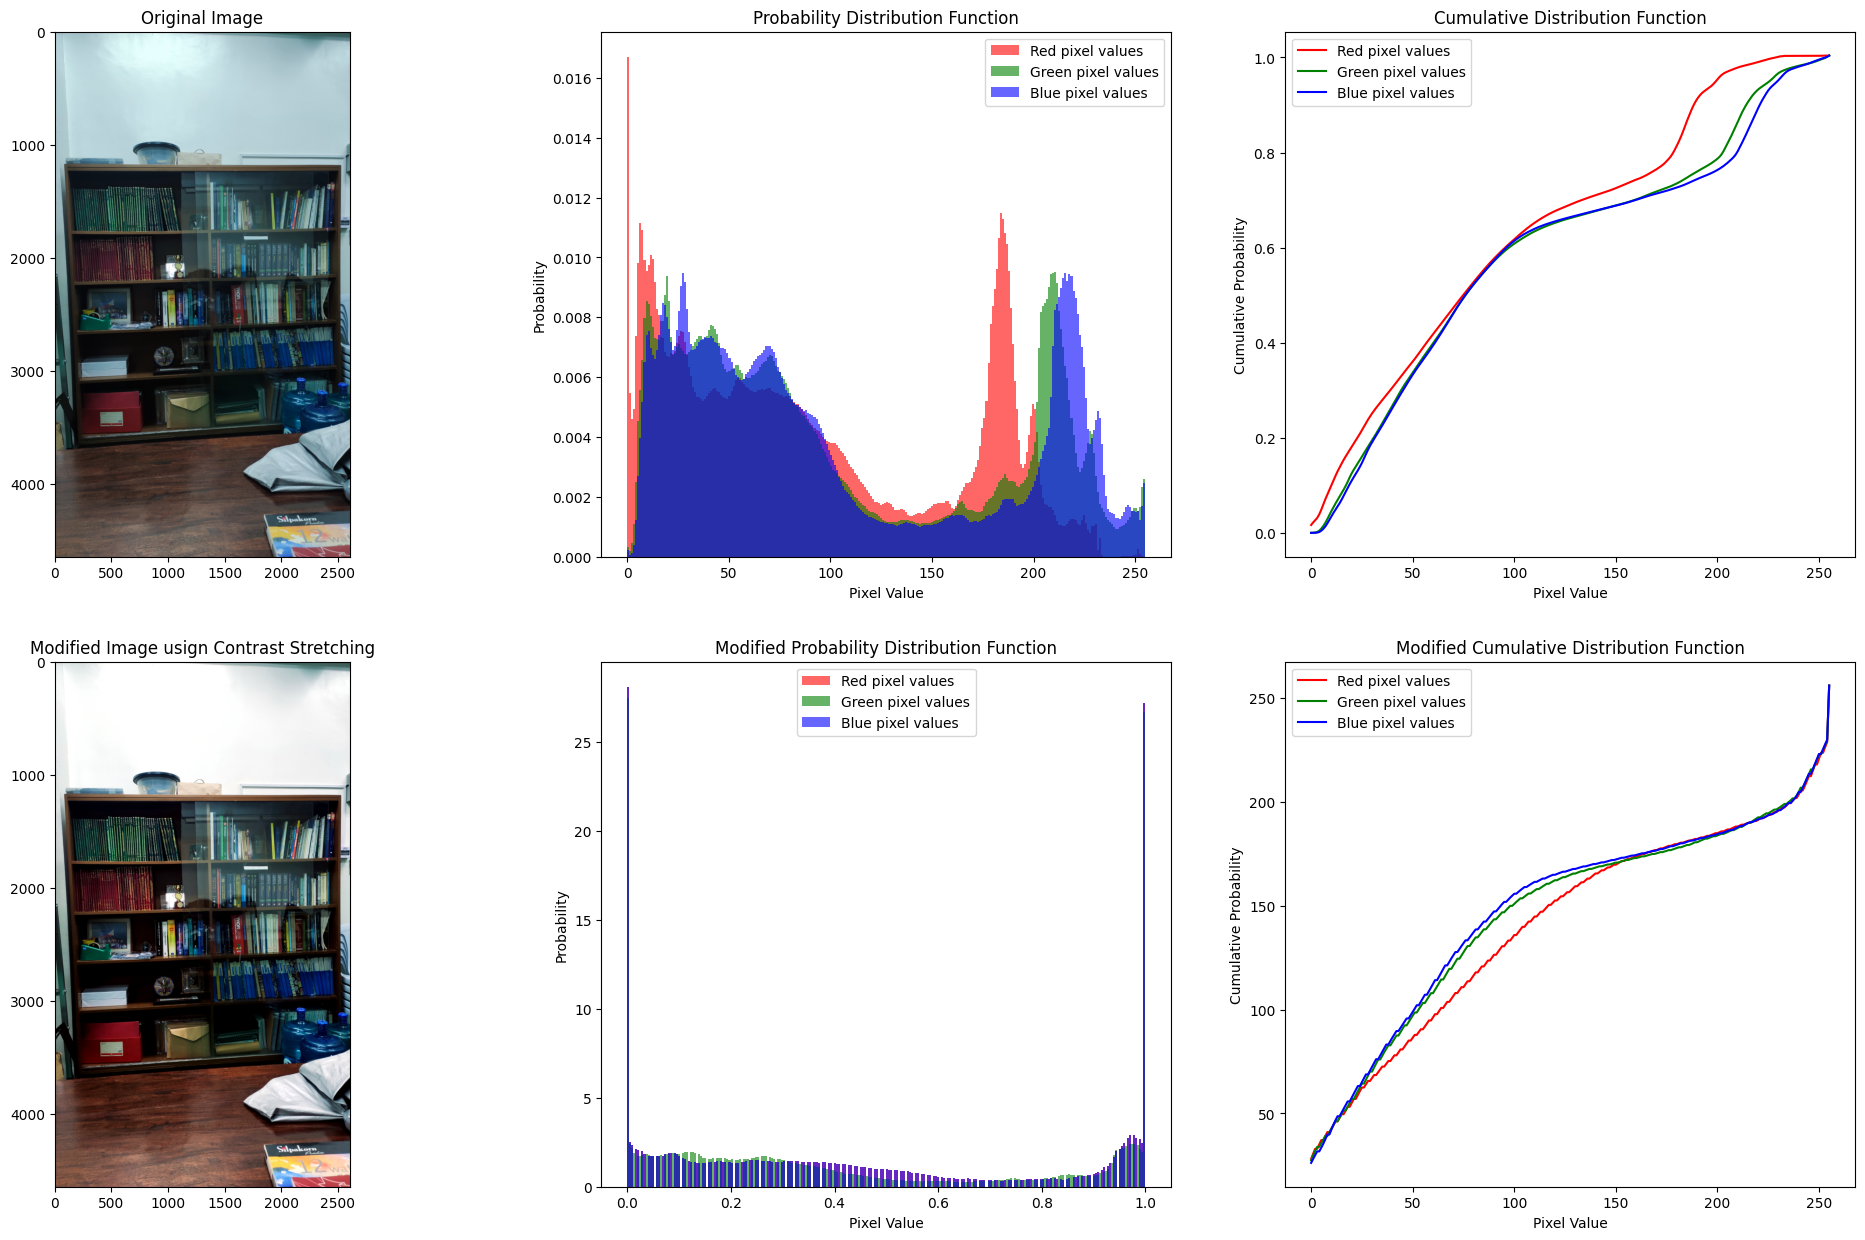

In [12]:
# Applying contrast stretching on each color

I_R_min = np.percentile(I_R, 10)
I_R_max = np.percentile(I_R, 90)
contrast_stretched_R = (I_R - I_R_min)/(I_R_max - I_R_min)
contrast_stretched_R[contrast_stretched_R > 1] = 1
contrast_stretched_R[contrast_stretched_R < 0] = 0


I_G_min = np.percentile(I_G, 10)
I_G_max = np.percentile(I_G, 90)
contrast_stretched_G = (I_G - I_G_min)/(I_G_max - I_G_min)
contrast_stretched_G[contrast_stretched_G > 1] = 1
contrast_stretched_G[contrast_stretched_G < 0] = 0


I_B_min = np.percentile(I_B, 10)
I_B_max = np.percentile(I_B, 90)
contrast_stretched_B = (I_B - I_B_min)/(I_B_max - I_B_min)
contrast_stretched_B[contrast_stretched_B > 1] = 1
contrast_stretched_B[contrast_stretched_B < 0] = 0


stretched_I = np.zeros(I.shape)
stretched_I[:,:,0] = contrast_stretched_R
stretched_I[:,:,1] = contrast_stretched_G
stretched_I[:,:,2] = contrast_stretched_B

# Getting stretched PDF and CDF

# Getting hist values and normalizing them
stretched_R_norm_hist_values, bin_edges  = np.histogram(contrast_stretched_R, bins = 256, density = True)
stretched_G_norm_hist_values, bin_edges  = np.histogram(contrast_stretched_G, bins = 256, density = True)
stretched_B_norm_hist_values, bin_edges  = np.histogram(contrast_stretched_B, bins = 256, density = True)

# Now making the CDF
stretched_R_CDF = np.cumsum(stretched_R_norm_hist_values)
stretched_G_CDF = np.cumsum(stretched_G_norm_hist_values)
stretched_B_CDF = np.cumsum(stretched_B_norm_hist_values)


# Plotting everything
fig, ax = plt.subplots(2,3, figsize = (25,15))
ax[0,0].imshow(I)
ax[0,0].set_title("Original Image")

ax[0,1].hist(I_R.flatten(), bins = 256, color = "r", density = True, label = "Red pixel values", alpha = 0.6)
ax[0,1].hist(I_G.flatten(), bins = 256, color = "g", density = True, label = "Green pixel values", alpha = 0.6)
ax[0,1].hist(I_B.flatten(), bins = 256, color = "b", density = True, label = "Blue pixel values", alpha = 0.6)
ax[0,1].set_ylabel("Probability")
ax[0,1].set_xlabel("Pixel Value")
ax[0,1].set_title("Probability Distribution Function")
ax[0,1].legend()

ax[0,2].plot(x, R_CDF, color = "r", label = "Red pixel values")
ax[0,2].plot(x, G_CDF, color = "g", label = "Green pixel values")
ax[0,2].plot(x, B_CDF, color = "b", label = "Blue pixel values")
ax[0,2].set_ylabel("Cumulative Probability")
ax[0,2].set_xlabel("Pixel Value")
ax[0,2].set_title("Cumulative Distribution Function")
ax[0,2].legend()

ax[1,0].imshow(stretched_I)
ax[1,0].set_title("Modified Image usign Contrast Stretching")

ax[1,1].hist(contrast_stretched_R.flatten(), bins = 256, color = "r", density = True, label = "Red pixel values", alpha = 0.6)
ax[1,1].hist(contrast_stretched_G.flatten(), bins = 256, color = "g", density = True, label = "Green pixel values", alpha = 0.6)
ax[1,1].hist(contrast_stretched_R.flatten(), bins = 256, color = "b", density = True, label = "Blue pixel values", alpha = 0.6)
ax[1,1].set_ylabel("Probability")
ax[1,1].set_xlabel("Pixel Value")
ax[1,1].set_title("Modified Probability Distribution Function")
ax[1,1].legend()

ax[1,2].plot(x, stretched_R_CDF, color = "r", label = "Red pixel values")
ax[1,2].plot(x, stretched_G_CDF, color = "g", label = "Green pixel values")
ax[1,2].plot(x, stretched_B_CDF, color = "b", label = "Blue pixel values")
ax[1,2].set_ylabel("Cumulative Probability")
ax[1,2].set_xlabel("Pixel Value")
ax[1,2].set_title("Modified Cumulative Distribution Function")
ax[1,2].legend()
plt.show()

## b. Gray World Algorithm

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


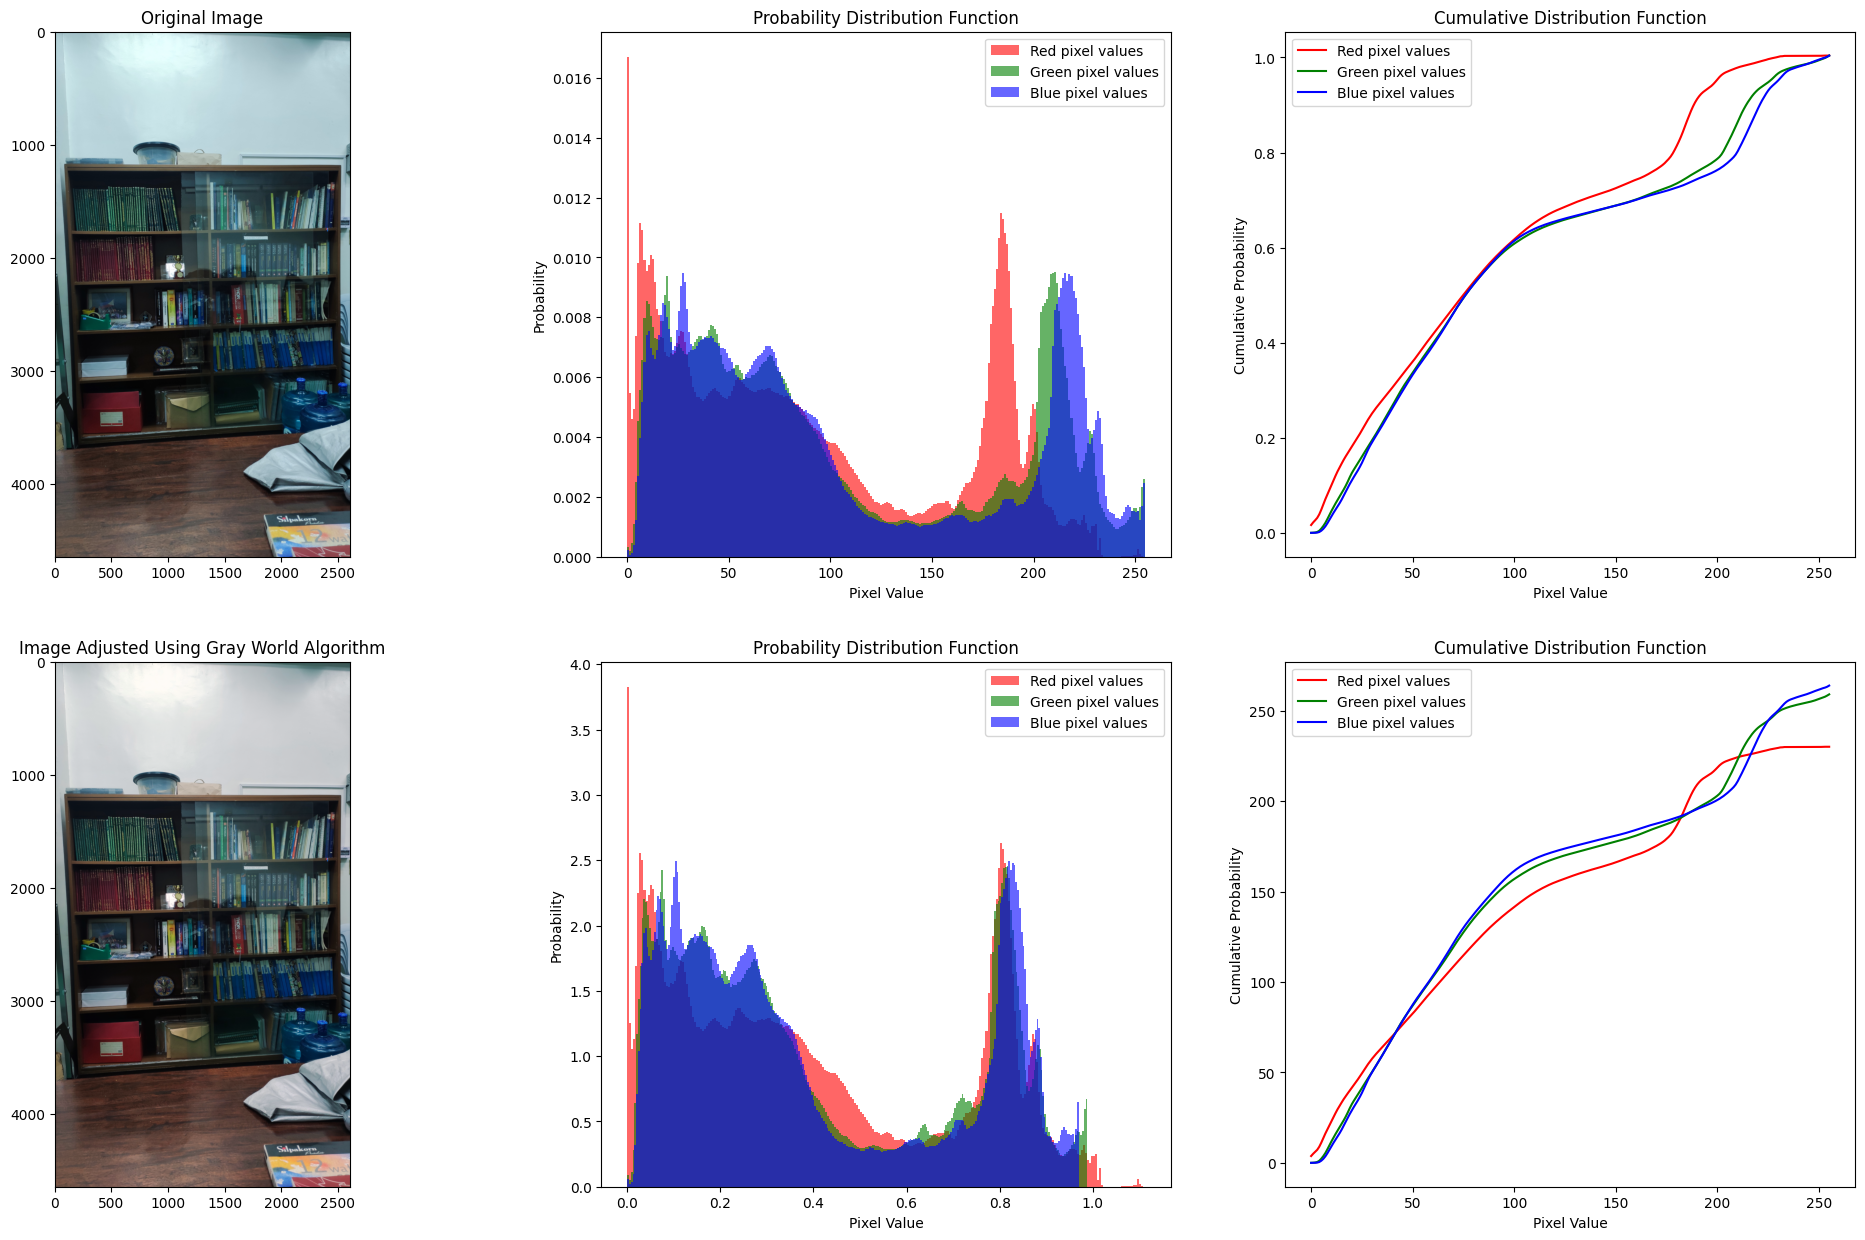

In [13]:
# Applying Gray World Algorithm
Rwb = I_R/np.average(I_R)

Gwb = I_G/np.average(I_G)

Bwb = I_B/np.average(I_B)


multiplier = 0.4
Iwb = np.zeros(I.shape)
Iwb[:,:,0] = multiplier*Rwb
Iwb[:,:,1] = multiplier*Gwb
Iwb[:,:,2] = multiplier*Bwb

# Getting histogram and CDF of the Gray World Image
# Getting the color channels
I_Rwb = Iwb[:,:,0]
I_Gwb = Iwb[:,:,1]
I_Bwb = Iwb[:,:,2]

# Getting hist values and normalizing them
R_norm_hist_valueswb, bin_edges  = np.histogram(I_Rwb, bins = 256, density = True)
G_norm_hist_valueswb, bin_edges  = np.histogram(I_Gwb, bins = 256, density = True)
B_norm_hist_valueswb, bin_edges  = np.histogram(I_Bwb, bins = 256, density = True)

# Now making the CDF
R_CDFwb = np.cumsum(R_norm_hist_valueswb)
G_CDFwb = np.cumsum(G_norm_hist_valueswb)
B_CDFwb = np.cumsum(B_norm_hist_valueswb)

# Plotting everything
fig, ax = plt.subplots(2,3, figsize = (25,15))
ax[0,0].imshow(I)
ax[0,0].set_title("Original Image")

ax[0,1].hist(I_R.flatten(), bins = 256, color = "r", density = True, label = "Red pixel values", alpha = 0.6)
ax[0,1].hist(I_G.flatten(), bins = 256, color = "g", density = True, label = "Green pixel values", alpha = 0.6)
ax[0,1].hist(I_B.flatten(), bins = 256, color = "b", density = True, label = "Blue pixel values", alpha = 0.6)
ax[0,1].set_ylabel("Probability")
ax[0,1].set_xlabel("Pixel Value")
ax[0,1].set_title("Probability Distribution Function")
ax[0,1].legend()

ax[0,2].plot(x, R_CDF, color = "r", label = "Red pixel values")
ax[0,2].plot(x, G_CDF, color = "g", label = "Green pixel values")
ax[0,2].plot(x, B_CDF, color = "b", label = "Blue pixel values")
ax[0,2].set_ylabel("Cumulative Probability")
ax[0,2].set_xlabel("Pixel Value")
ax[0,2].set_title("Cumulative Distribution Function")
ax[0,2].legend()

ax[1,0].imshow(Iwb)
ax[1,0].set_title("Image Adjusted Using Gray World Algorithm")

ax[1,1].hist(I_Rwb.flatten(), bins = 256, color = "r", density = True, label = "Red pixel values", alpha = 0.6)
ax[1,1].hist(I_Gwb.flatten(), bins = 256, color = "g", density = True, label = "Green pixel values", alpha = 0.6)
ax[1,1].hist(I_Bwb.flatten(), bins = 256, color = "b", density = True, label = "Blue pixel values", alpha = 0.6)
ax[1,1].set_ylabel("Probability")
ax[1,1].set_xlabel("Pixel Value")
ax[1,1].set_title("Probability Distribution Function")
ax[1,1].legend()

ax[1,2].plot(x, R_CDFwb, color = "r", label = "Red pixel values")
ax[1,2].plot(x, G_CDFwb, color = "g", label = "Green pixel values")
ax[1,2].plot(x, B_CDFwb, color = "b", label = "Blue pixel values")
ax[1,2].set_ylabel("Cumulative Probability")
ax[1,2].set_xlabel("Pixel Value")
ax[1,2].set_title("Cumulative Distribution Function")
ax[1,2].legend()
plt.show()

## c.) White patch algorithm

Ill choose the region above the shelf because it is known to be white paint.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


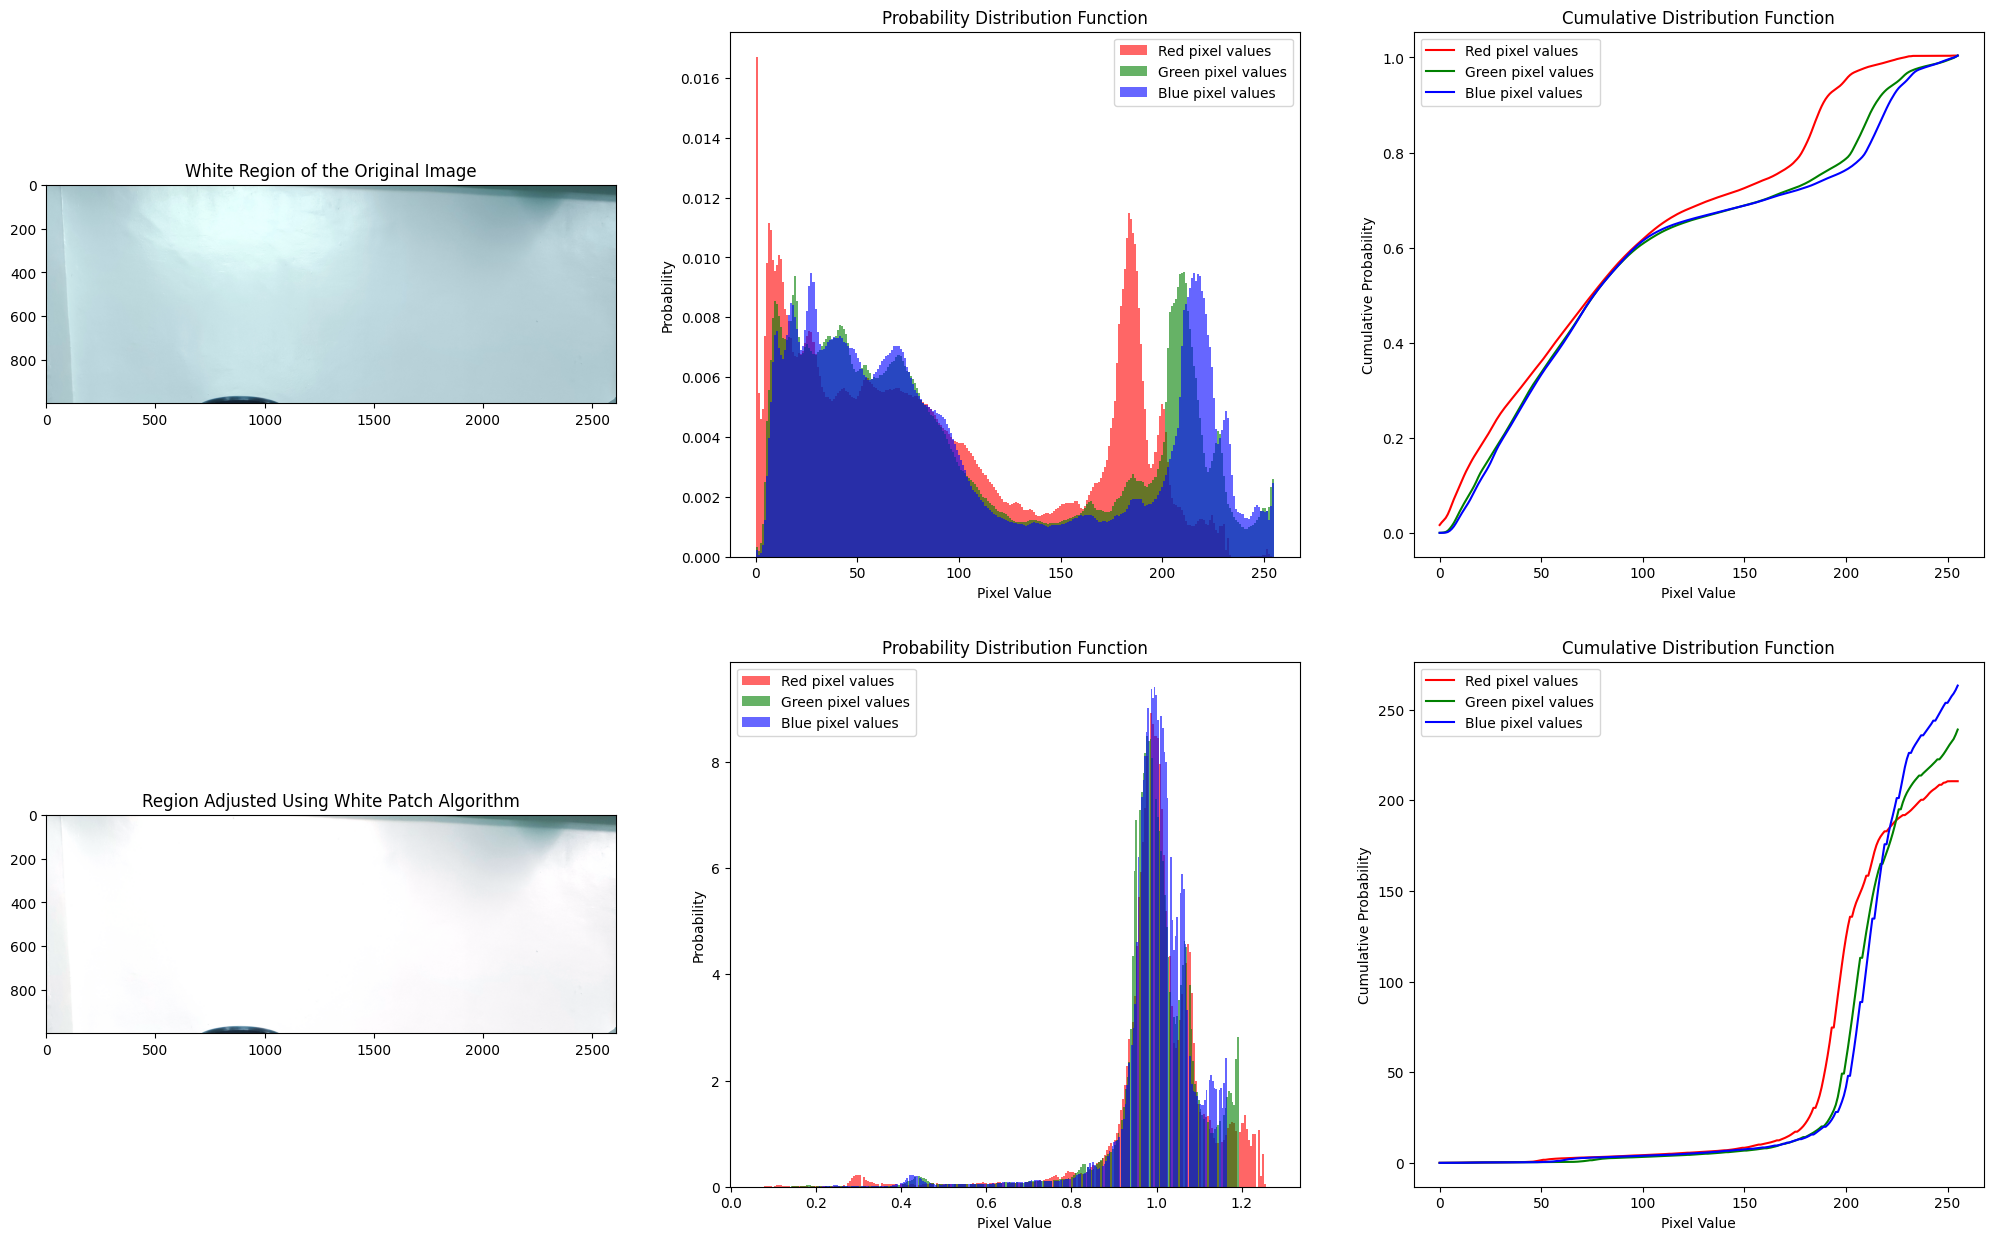

In [14]:
white_region = I[0:1000,:,:]

white_R = white_region[:,:,0]
white_G = white_region[:,:,1]
white_B = white_region[:,:,2]

Rw = np.average(white_R)
Gw = np.average(white_G)
Bw = np.average(white_B)

patched_I_R = white_R/Rw
patched_I_G = white_G/Gw
patched_I_B = white_B/Bw

patched_image = np.zeros(white_region.shape)
patched_image[:,:,0] = patched_I_R
patched_image[:,:,1] = patched_I_G
patched_image[:,:,2] = patched_I_B


# Getting hist values and normalizing them
patched_R_norm_hist_values, bin_edges  = np.histogram(patched_I_R, bins = 256, density = True)
patched_G_norm_hist_values, bin_edges  = np.histogram(patched_I_G, bins = 256, density = True)
patched_B_norm_hist_values, bin_edges  = np.histogram(patched_I_B, bins = 256, density = True)

# Now making the CDF
patched_R_CDF = np.cumsum(patched_R_norm_hist_values)
patched_G_CDF = np.cumsum(patched_G_norm_hist_values)
patched_B_CDF = np.cumsum(patched_B_norm_hist_values)


# Plotting everything
fig, ax = plt.subplots(2,3, figsize = (25,15))
ax[0,0].imshow(white_region)
ax[0,0].set_title("White Region of the Original Image")

ax[0,1].hist(I_R.flatten(), bins = 256, color = "r", density = True, label = "Red pixel values", alpha = 0.6)
ax[0,1].hist(I_G.flatten(), bins = 256, color = "g", density = True, label = "Green pixel values", alpha = 0.6)
ax[0,1].hist(I_B.flatten(), bins = 256, color = "b", density = True, label = "Blue pixel values", alpha = 0.6)
ax[0,1].set_ylabel("Probability")
ax[0,1].set_xlabel("Pixel Value")
ax[0,1].set_title("Probability Distribution Function")
ax[0,1].legend()

ax[0,2].plot(x, R_CDF, color = "r", label = "Red pixel values")
ax[0,2].plot(x, G_CDF, color = "g", label = "Green pixel values")
ax[0,2].plot(x, B_CDF, color = "b", label = "Blue pixel values")
ax[0,2].set_ylabel("Cumulative Probability")
ax[0,2].set_xlabel("Pixel Value")
ax[0,2].set_title("Cumulative Distribution Function")
ax[0,2].legend()

ax[1,0].imshow(patched_image)
ax[1,0].set_title("Region Adjusted Using White Patch Algorithm")

ax[1,1].hist(patched_I_R.flatten(), bins = 256, color = "r", density = True, label = "Red pixel values", alpha = 0.6)
ax[1,1].hist(patched_I_G.flatten(), bins = 256, color = "g", density = True, label = "Green pixel values", alpha = 0.6)
ax[1,1].hist(patched_I_B.flatten(), bins = 256, color = "b", density = True, label = "Blue pixel values", alpha = 0.6)
ax[1,1].set_ylabel("Probability")
ax[1,1].set_xlabel("Pixel Value")
ax[1,1].set_title("Probability Distribution Function")
ax[1,1].legend()

ax[1,2].plot(x, patched_R_CDF, color = "r", label = "Red pixel values")
ax[1,2].plot(x, patched_G_CDF, color = "g", label = "Green pixel values")
ax[1,2].plot(x, patched_B_CDF, color = "b", label = "Blue pixel values")
ax[1,2].set_ylabel("Cumulative Probability")
ax[1,2].set_xlabel("Pixel Value")
ax[1,2].set_title("Cumulative Distribution Function")
ax[1,2].legend()
plt.show()